## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [1]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [2]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # boucle appliquant l'algorithme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ):
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [3]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)


### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [4]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


#### 1. Estimation of w

In [5]:
#Exercise 1
Nitermax = 50; eps_conv=1e-3;
# w, Niter = regression_logistique(X, t)
[w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)

#### 2. Decision function on the test set

In [6]:
y_n = 1/(1+np.exp(-X_test.dot(w)))

#### 3.1. Decision boundary on the test displayed with training data

Text(0.5, 1.0, 'Decision Boundary with training data')

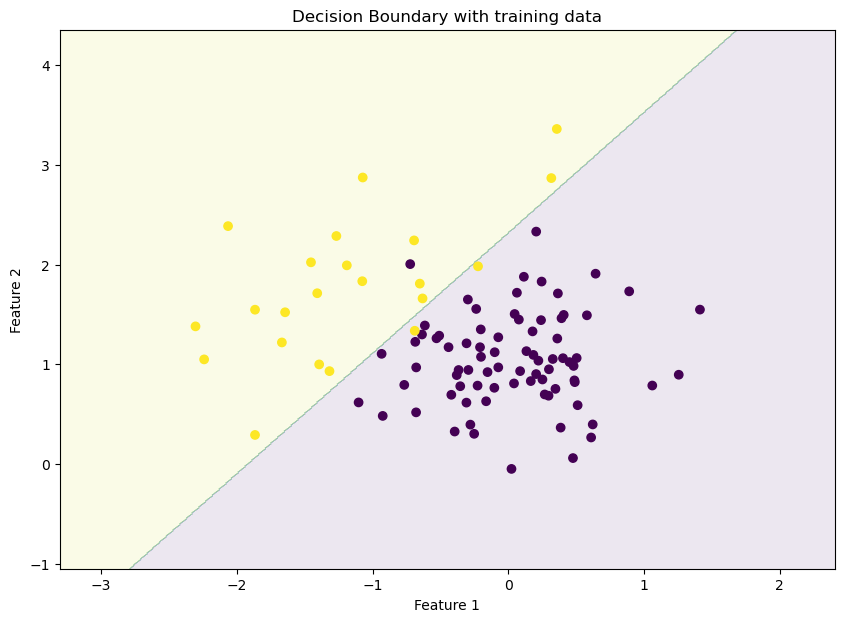

In [7]:
# To Plot the Decision Boundary for LDA
arr1 = np.arange(x_train[:, 0].min()-1, x_train[:, 0].max()+1, 0.01)
arr2 = np.arange(x_train[:, 1].min()-1, x_train[:, 1].max()+1, 0.01)


xx, yy = np.meshgrid(arr1, arr2)
input_arr = np.array([xx.ravel(), yy.ravel()]).T
N_input = np.size(input_arr,axis=0)
input_array = np.hstack((np.ones((N_input,1)),input_arr))

# For the prediction
# labels = clf.predict(input_array)
labels = np.where(1/(1+np.exp(-input_array.dot(w)))> 0.5, 1, 0)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(x_train[:, 0], x_train[:, 1], c = t.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with training data')

Using, Professor's code:


Text(0.5, 1.0, 'Decision Boundary with training data')

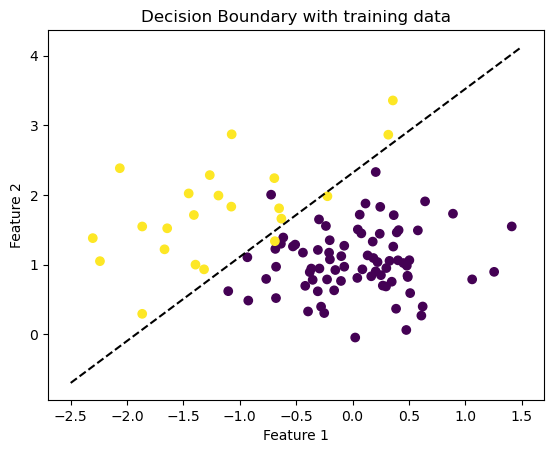

In [8]:

x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--')
plt.scatter(x_train[:, 0], x_train[:, 1], c = t.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with training data')

#### 3.2. Decision boundary on the test displayed with test data

Text(0.5, 1.0, 'Decision Boundary with test data')

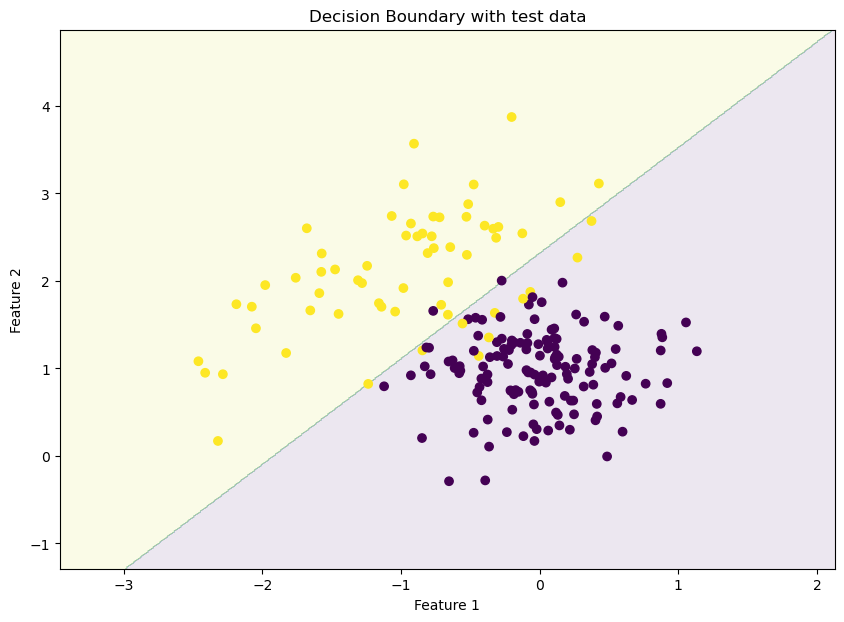

In [9]:
# To Plot the Decision Boundary for LDA
arr1 = np.arange(x_test[:, 0].min()-1, x_test[:, 0].max()+1, 0.01)
arr2 = np.arange(x_test[:, 1].min()-1, x_test[:, 1].max()+1, 0.01)


xx, yy = np.meshgrid(arr1, arr2)
input_arr = np.array([xx.ravel(), yy.ravel()]).T
N_input = np.size(input_arr,axis=0)
input_array = np.hstack((np.ones((N_input,1)),input_arr))

# For the prediction
# labels = clf.predict(input_array)
labels = np.where(1/(1+np.exp(-input_array.dot(w)))> 0.5, 1, 0)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(x_test[:, 0], x_test[:, 1], c = t_test.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with test data')

Using, Professor's code:

Text(0.5, 1.0, 'Decision Boundary with test data')

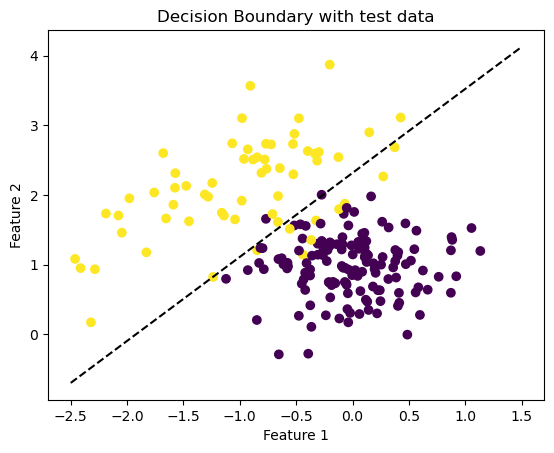

In [10]:
x1 = np.linspace(-2.5,1.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--')
plt.scatter(x_test[:, 0], x_test[:, 1], c = t_test.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with test data')

#### 4. The equation which defines the decision boundary.

In [11]:
# The decision is non-linear defined the logistic function
# However the decision boundary is defined by a hyperplane which geneal expression is w^Tx + w0 = 0
# Therefore, one can write the decison boundary as follows: $w_tilde^Tx = 0$

#### 5.1. Robustness of logistic regression to outliers

In [15]:
np.random.seed(21) # Fixed seed for reproducibility of the results

x_outliers = np.random.uniform(10, 20, size=(20, 2))
x_train_outliers = np.vstack((x_outliers,x_train))
N_train_outliers = np.size(x_train_outliers,axis=0)
X = np.hstack((np.ones((N_train_outliers,1)),x_train_outliers))


t_outliers = np.random.randint(2, size=(20, 1))
t_train_outliers = np.vstack((t_outliers,t.reshape(100,1)))

In [16]:
# Estimation of w
Nitermax = 50; eps_conv=1e-3;
# w, Niter = regression_logistique(X, t)
[w,Niter] = regression_logistique(X,t_train_outliers.ravel(),Nitermax,eps_conv)

Text(0.5, 1.0, 'Decision Boundary with training data')

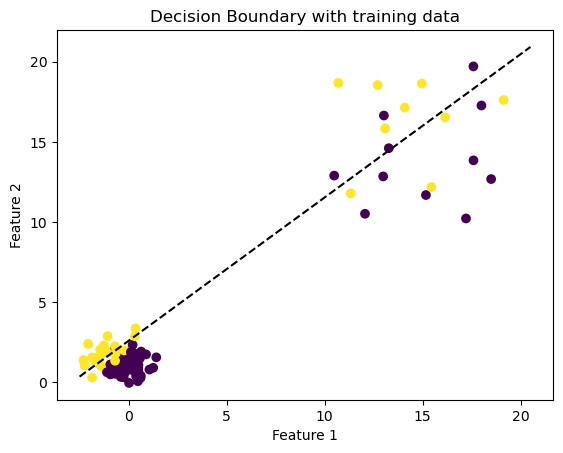

In [17]:
# The decision boundary
x1 = np.linspace(-2.5,20.5,10) 
x2 = (-w[0]-w[1]*x1)/w[2]
plt.plot(x1,x2,'k--')
plt.scatter(x_train_outliers[:, 0], x_train_outliers[:, 1], c = t_train_outliers.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with training data')

#### 5.2. Comparison with LDA

Text(0.5, 1.0, 'Decision Boundary for LDA')

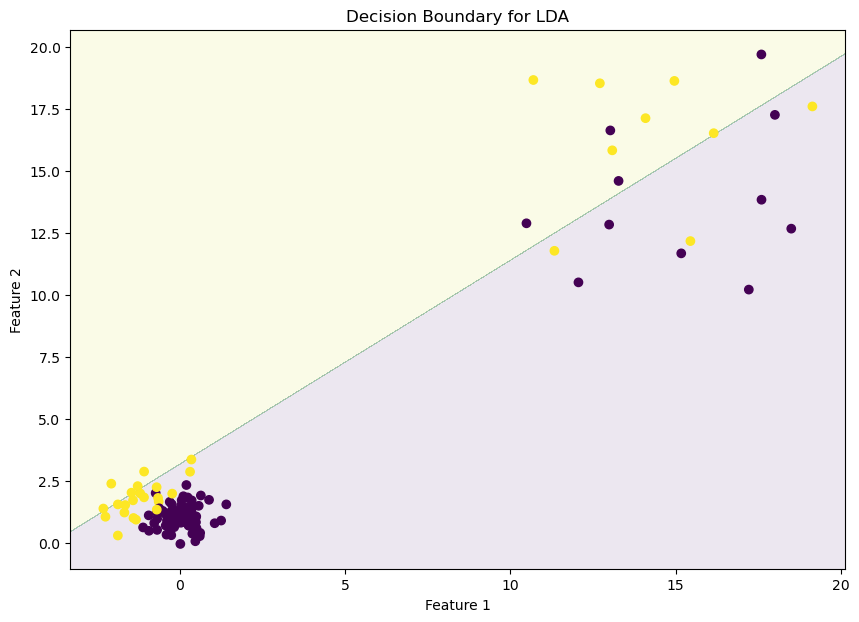

In [20]:
indiceC1_train = np.nonzero(t_train_outliers.ravel()==1)
indiceC0_train = np.nonzero(t_train_outliers.ravel()==0)


X_C1_train=x_train_outliers[indiceC1_train].T
X_C0_train=x_train_outliers[indiceC0_train].T




class_train_1_out = np.where(t_train_outliers==1)[0]
class_train_0_out = np.where(t_train_outliers==0)[0]

N1_train = np.size(class_train_1_out,axis=0)
N0_train = np.size(class_train_0_out,axis=0)

# Estimation of weights pi_1 and pi_2 for each class
pi_1 = N1_train/N_train_outliers
pi_0 = N0_train/N_train_outliers

# Estimation of empirical means mu_1 and mu_2 for each class
mu_1 = (X_C1_train.sum(1))/N1_train # Same as "mu_1 = X1_train.mean(1)"
mu_0 = (X_C0_train.sum(1))/N0_train # Same as "mu_2 = X2_train.mean(1)"

mu_1=mu_1.reshape(2,1)
mu_0=mu_0.reshape(2,1)


# Estimation of empirical covariance matrices sigma_1 and sigma_2
sigma_1 = ((X_C1_train - mu_1).dot((X_C1_train - mu_1).T))/N1_train # The same as "sigma_1 = np.cov(X1_train.T, ddof=0)"
# sigma_1 = (np.matmul((X_C1_train-mu_1),(X_C1_train-mu_1).T))/N1_train
sigma_0 = ((X_C0_train - mu_0).dot((X_C0_train - mu_0).T))/N0_train # The same as "sigma_2 = np.cov(X2_train.T, ddof=0)"

# sigma_2 = (np.matmul((X_C2_train-mu_2),(X_C2_train-mu_2).T))/N2_train

# Computation of the common averaged covariance sigma (average of intra-class covariances)
sigma = (N1_train*sigma_1 + N0_train*sigma_0)/N_train_outliers




# Computation of log-probabilities of belonging to each class
# We keep only dependance on the classes 1 and 2
log_proba_1 = mu_1.T.dot(inv(sigma)).dot(X_C1_train) - (1/2)*mu_1.T.dot(inv(sigma)).dot(mu_1) + log(pi_1)
log_proba_0 = mu_0.T.dot(inv(sigma)).dot(X_C0_train) - (1/2)*mu_0.T.dot(inv(sigma)).dot(mu_0) + log(pi_0)


# Decision of classification
# Linear parameters for the decision function 1
w1 = inv(sigma).dot(mu_1)
w01 = - (1/2)*mu_1.T.dot(inv(sigma)).dot(mu_1) + log(pi_1)

# Linear parameters for the decision function 2
w2 = inv(sigma).dot(mu_0)
w02 = - (1/2)*mu_0.T.dot(inv(sigma)).dot(mu_0) + log(pi_0)




# To Plot the Decision Boundary for LDA
arr1 = np.arange(x_train_outliers[:, 0].min()-1, x_train_outliers[:, 0].max()+1, 0.01)
arr2 = np.arange(x_train_outliers[:, 1].min()-1, x_train_outliers[:, 1].max()+1, 0.01)


xx, yy = np.meshgrid(arr1, arr2)
input_array = np.array([xx.ravel(), yy.ravel()]).T

# For the prediction
# labels = clf_LDA.predict(input_array)
f_X_1_dec_func = w1.T.dot(input_array.T) + w01
f_X_2_dec_func = w2.T.dot(input_array.T) + w02

labels = np.where(f_X_1_dec_func.T > f_X_2_dec_func.T, 1, 0)

plt.figure(figsize =(10, 7))
plt.contourf(xx, yy, labels.reshape(xx.shape), alpha = 0.1)
plt.scatter(x_train_outliers[:, 0], x_train_outliers[:, 1], c = t_train_outliers.ravel(), alpha = 1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for LDA')

#### 5.3. Comments

In [25]:
# Test Error of LOGISTIC REGRESSION
# labels = clf.predict(input_array)
labels = np.where(1/(1+np.exp(-X_test.dot(w)))> 0.5, 1, 0)

error_Log_Reg = 1-mean(t_test == labels)
print("The test error of logistic regression taking into account the outliers is", error_Log_Reg)

# Test Error of LDA
# We compute the hyperplanes for seperation of regions between classes
f_X_1 = w1.T.dot(x_test.T) + w01
f_X_2 = w2.T.dot(x_test.T) + w02

# Decision of classification
decision_vector = np.where(f_X_1.T > f_X_2.T, 1, 0)


error_LDA = 1-mean(t_test == decision_vector)
print("The test error of LDA taking into account the outliers is", error_LDA)

The test error of logistic regression taking into account the outliers is 0.06999999999999995
The test error of LDA taking into account the outliers is 0.3537


Logistic regression is performing better than LDA in presence of ouliers

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [6]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


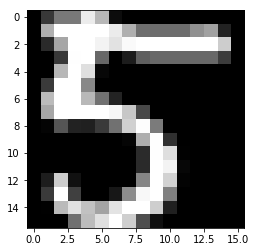

In [7]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

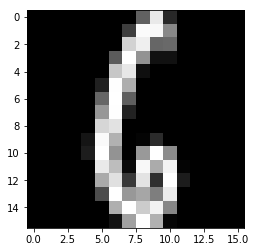

In [8]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [ ]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [ ]:
# Exercise 2

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://kr.coursera.org/lecture/machine-learning/regularized-logistic-regression-cAxpF 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [ ]:
# Include your code here
from sklearn.linear_model import LogisticRegression
# ...,


Commentaires :